In [1]:
import pandas as pd
import networkx as nx
import numpy as np



In [2]:
from google.colab import files

acq= files.upload()

random = files.upload()


Saving c88-2023_links_acquaintances - Sheet1.csv to c88-2023_links_acquaintances - Sheet1.csv


Saving c88-2023_links_random - Sheet1.csv to c88-2023_links_random - Sheet1.csv


In [3]:
acq_table= pd.read_csv("c88-2023_links_acquaintances - Sheet1.csv")

random_table=pd.read_csv("c88-2023_links_random - Sheet1.csv")

In [36]:
acq_table
random_table

,source,target
0,19,23
1,19,44
2,19,34
3,19,12
4,13,27
...,...,...
171,14,3
172,45,33
173,45,41
174,45,4


In [5]:
acqgraph= nx.Graph()
for x in range(len(acq_table)):
  acqsource = acq_table["source"]
  acqtarget = acq_table["target"]

  acqgraph.add_edge(acqsource[x],acqtarget[x])


                    






In [6]:
randomgraph= nx.Graph()
for x in range(len(random_table)):
  randomsource = random_table["source"]
  randomtarget = random_table["target"]

  randomgraph.add_edge(randomsource[x],randomtarget[x])


##Basic Network Analysis 1

In [17]:
print("Number of Nodes in acquaintance class graph:",acqgraph.number_of_nodes())

Number of Nodes in acquaintance class graph: 43


In [18]:
print("Number of Edges in acquaintance class graph:",acqgraph.number_of_edges())

Number of Edges in acquaintance class graph: 64


In [20]:

print("Number of Nodes in random class graph:",randomgraph.number_of_nodes())

Number of Nodes in random class graph: 60


In [19]:
print("Number of Edges in random class graph:",randomgraph.number_of_edges())

Number of Edges in random class graph: 174


##Basic Network Analysis 2

In [27]:
degrees_acq = dict(acqgraph.degree)
print('the maximum degree in the acq graph is:', max(degrees_acq.values()), 'and it belongs to node:', degrees_acq.get(max(degrees_acq.values())))
degrees_rand = dict(randomgraph.degree)
print('the maximum degree in the acq graph is:', max(degrees_rand.values()), 'and it belongs to node:', degrees_rand.get(max(degrees_rand.values())))

the maximum degree in the acq graph is: 10 and it belongs to node: 4
the maximum degree in the acq graph is: 13 and it belongs to node: 7


In [26]:
# for node in acqgraph.nodes():
#   print("Degree of", node, "is : ",len(list(acqgraph.neighbors(node)) ),"or",acqgraph.degree(node))

In [28]:
# for node in randomgraph.nodes():
#   print("Degree of", node, "is : ",len(list(randomgraph.neighbors(node)) ),"or",randomgraph.degree(node))

In [30]:
Avg_D_acq=np.mean(list(dict(acqgraph.degree()).values()))
Avg_D_acq

2.9767441860465116

In [31]:
print("Average Degree for acqgraph is ", Avg_D_acq)

Average Degree for acqgraph is  2.9767441860465116


In [33]:
Avg_D_random=np.mean(list(dict(randomgraph.degree()).values()))

In [35]:
print("Average Degree for acqgraph is ", Avg_D_random)

Average Degree for acqgraph is  5.8


In [44]:
print('average shortest path for acq graph then random graph(from class data):', nx.average_shortest_path_length(acqgraph.subgraph(sorted(nx.connected_components(acqgraph), key=len,reverse=True)[0])),'and', nx.average_shortest_path_length(randomgraph.subgraph(sorted(nx.connected_components(randomgraph), key=len,reverse=True)[0])))

average shortest path for acq graph then random graph(from class data): 3.7585365853658534 and 2.5


In [57]:
cp_acq = nx.average_clustering(acqgraph)
cp_rand = nx.average_clustering(randomgraph)
print('average clustering coeff for acq then random graph:', cp_acq,'and', cp_rand)

average clustering coeff for acq then random graph: 0.29368770764119595 and 0.1021218596218596


In [66]:
rand_acq_model = nx.erdos_renyi_graph(43, .1)
rand_rand_model = nx.erdos_renyi_graph(60, .1)
print('the avg cc of rand_acq is:', nx.average_clustering(rand_acq_model))
print('the avg cc of rand_rand is:', nx.average_clustering(rand_rand_model))
print('the avg degree of rand_acq:', np.mean(list(dict(rand_acq_model.degree()).values())))
print('the avg degree of rand_rand:', np.mean(list(dict(rand_rand_model.degree()).values())))
print('the avg short path rand_acq is:', nx.average_shortest_path_length(rand_acq_model))
print('the avg short path rand_rand is:', nx.average_shortest_path_length(rand_rand_model))
print('the number of edges for rand_acq:', nx.number_of_edges(rand_acq_model))
print('the number of edges for rand_rand:', nx.number_of_edges(rand_rand_model))

the avg cc of rand_acq is: 0.07364341085271317
the avg cc of rand_rand is: 0.13119241869241868
the avg degree of rand_acq: 4.558139534883721
the avg degree of rand_rand: 6.933333333333334
the avg short path rand_acq is: 2.5991140642303434
the avg short path rand_rand is: 2.3073446327683618
the number of edges for rand_acq: 98
the number of edges for rand_rand: 208


In [58]:
#calculate p values for random models, first for acq then for random

c0_acq = nx.average_clustering(nx.watts_strogatz_graph(43, 5, 0))
c0_rand = nx.average_clustering(nx.watts_strogatz_graph(60, 4, 0))

p_acq = 1-pow(cp_acq/c0_acq, 1/3)
p_rand = 1-pow(cp_rand/c0_rand, 1/3)

In [81]:
sw_acq_model = nx.watts_strogatz_graph(43,4,p_acq)
sw_rand_model = nx.watts_strogatz_graph(60, 5, p_rand)

In [82]:
print('the avg cc of sw_acq_model is:', nx.average_clustering(sw_acq_model))
print('the avg cc of sw_rand_model is:', nx.average_clustering(sw_rand_model))
print('the avg degree of sw_acq_model:', np.mean(list(dict(sw_acq_model.degree()).values())))
print('the avg degree of sw_rand_model:', np.mean(list(dict(sw_rand_model.degree()).values())))
print('the avg short path sw_acq_model is:', nx.average_shortest_path_length(sw_acq_model))
print('the avg short path sw_rand_model is:', nx.average_shortest_path_length(sw_rand_model))
print('the number of edges for sw_acq_model:', nx.number_of_edges(sw_acq_model))
print('the number of edges for sw_rand_model:', nx.number_of_edges(sw_rand_model))

the avg cc of sw_acq_model is: 0.32403100775193794
the avg cc of sw_rand_model is: 0.14126984126984127
the avg degree of sw_acq_model: 4.0
the avg degree of sw_rand_model: 4.0
the avg short path sw_acq_model is: 3.2270210409745292
the avg short path sw_rand_model is: 3.1745762711864405
the number of edges for sw_acq_model: 86
the number of edges for sw_rand_model: 120


In [85]:
barb_model_rand = nx.barabasi_albert_graph(60, 4)

In [89]:
barb_model_acq = nx.barabasi_albert_graph(43, 2)

In [90]:
print('the avg cc of barb_model_rand is:', nx.average_clustering(barb_model_rand))
print('the avg cc of barb_model_acq is:', nx.average_clustering(barb_model_acq))
print('the avg degree of barb_model_rand:', np.mean(list(dict(barb_model_rand.degree()).values())))
print('the avg degree of barb_model_acq:', np.mean(list(dict(barb_model_acq.degree()).values())))
print('the avg short path barb_model_rand is:', nx.average_shortest_path_length(barb_model_rand))
print('the avg short path barb_model_acq is:', nx.average_shortest_path_length(barb_model_acq))
print('the number of edges for barb_model_rand:', nx.number_of_edges(barb_model_rand))
print('the number of edges for barb_model_acq:', nx.number_of_edges(barb_model_acq))

the avg cc of barb_model_rand is: 0.20973522335364442
the avg cc of barb_model_acq is: 0.10448866379098937
the avg degree of barb_model_rand: 7.466666666666667
the avg degree of barb_model_acq: 3.813953488372093
the avg short path barb_model_rand is: 2.1875706214689266
the avg short path barb_model_acq is: 2.62015503875969
the number of edges for barb_model_rand: 224
the number of edges for barb_model_acq: 82


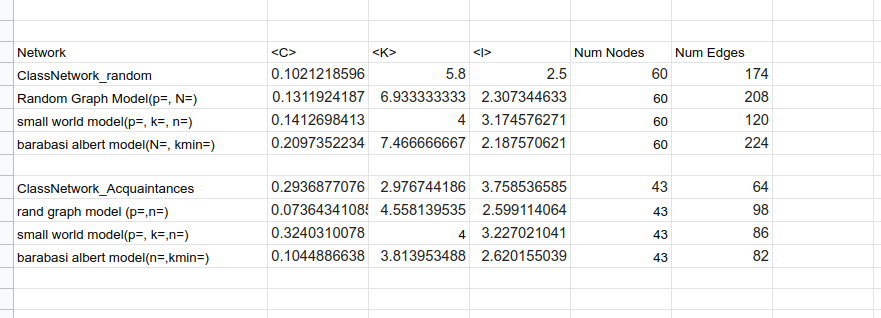

##Question 7

based on the table, the small world model matches best with the 